# Splitting of arrays

The opposite of concatenation is splitting, which is implemented by the functions np.split, np.hsplit, and np.vsplit. 

In [3]:
import numpy as np
x = [1, 2, 3, 99, 99, 3, 2, 1]
x1, x2 ,x3= np.split(x, [2,5])
print(x1, x2, x3) #np.hsplit, and np.vsplit works the same way but in horizontal and vertical directions

[1 2] [ 3 99 99] [3 2 1]


In [4]:
grid = np.arange(16).reshape((4, 4))
grid


array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [7]:
up,down=np.split(grid,[2]) #here np.split is performing same task as np.hsplit
print(up)
print(down)

[[0 1 2 3]
 [4 5 6 7]]
[[ 8  9 10 11]
 [12 13 14 15]]


In [42]:
left, right = np.hsplit(grid, [2])
print(left)
print(right)

[[ 0  1]
 [ 4  5]
 [ 8  9]
 [12 13]]
[[ 2  3]
 [ 6  7]
 [10 11]
 [14 15]]


Similarly, np.dsplit will split arrays along the third axis

# Computation on NumPy Arrays: Universal Functions

Computation on NumPy arrays can be very fast, or it can be very slow. The key to making it fast is 
to use vectorized operations, generally implemented through NumPy’s universal functions (ufuncs).

In [1]:
import numpy as np # ufunc is created which reduces the timw significantly, whereas normal python function would have taken longer times
np.random.seed(0)

def compute_reciprocals(values): # a compute_reciprocals function is created
 output = np.empty(len(values))  # len(values)=5, output=np.empty(5) is obtained
 for i in range(len(values)):     # for i in range(5)
   output[i] = 1.0 / values[i]   
 return output
 
values = np.random.randint(1, 10, size=5) # randomly 5 integers between 1 and 10 are called
compute_reciprocals(values)               # compute_reciprocals function is called


array([0.16666667, 1.        , 0.25      , 0.25      , 0.125     ])

In [11]:
np.full((2,3),fill_value=5) # create a full array having shape (2,3) and value to be filled is 5

array([[5, 5, 5],
       [5, 5, 5]])

In [5]:
len(values)


5

This implementation probably feels fairly natural to someone from, say, a C or Java
background. But if we measure the execution time of this code for a large input, we
see that this operation is very slow, perhaps surprisingly so!

 It turns
out that the bottleneck here is not the operations themselves, but the type-checking
and function dispatches that CPython must do at each cycle of the loop. Each time
the reciprocal is computed, Python first examines the object’s type and does a
dynamic lookup of the correct function to use for that type. If we were working in
compiled code instead, this type specification would be known before the code 
executes and the result could be computed much more efficiently

In [25]:
np.arange(5) / np.arange(1, 6)


array([0.        , 0.5       , 0.66666667, 0.75      , 0.8       ])

In [29]:
x = np.arange(9).reshape((3, 3))
2**x

array([[  1,   2,   4],
       [  8,  16,  32],
       [ 64, 128, 256]], dtype=int32)

Computations using vectorization through ufuncs are nearly always more efficient
than their counterpart implemented through Python loops, especially as the arrays
grow in size. Any time you see such a loop in a Python script, you should consider
whether it can be replaced with a vectorized expression.

# Exploring NumPy’s UFuncs

In [30]:
x = np.arange(4)
print("x =", x)
print("x + 5 =", x + 5)
print("x - 5 =", x - 5)
print("x * 2 =", x * 2)
print("x / 2 =", x / 2)
print("x // 2 =", x // 2) # floor division


x = [0 1 2 3]
x + 5 = [5 6 7 8]
x - 5 = [-5 -4 -3 -2]
x * 2 = [0 2 4 6]
x / 2 = [0.  0.5 1.  1.5]
x // 2 = [0 0 1 1]


There is also a unary ufunc for negation, a ** operator for exponentiation, and a %
operator for modulus:

In [31]:
print("-x = ", -x)
print("x ** 2 = ", x ** 2)
print("x % 2 = ", x % 2)


-x =  [ 0 -1 -2 -3]
x ** 2 =  [0 1 4 9]
x % 2 =  [0 1 0 1]


All of these arithmetic operations are simply convenient wrappers around specific
functions built into NumPy; for example, the + operator is a wrapper for the add
function:

In [32]:
np.add(x, 2)

array([2, 3, 4, 5])

In [33]:
np.negative(x) #These are all numpy ufunc which take less time as compared to operators itself

array([ 0, -1, -2, -3])

In [5]:
x = np.array([-2, -1, 0, 1, 2])

In [6]:
abs(x) # abs() is a python function to obtain absolute value

array([2, 1, 0, 1, 2])

In [7]:
np.absolute(x) #np.absolute isIpython func to obtain absolute value , it can also be written as np.abs()

array([2, 1, 0, 1, 2])

In [9]:
theta=np.linspace(0,np.pi,3)
theta

array([0.        , 1.57079633, 3.14159265])

In [10]:
np.sin(theta)

array([0.0000000e+00, 1.0000000e+00, 1.2246468e-16])

In [14]:
print("theta = ", theta)
print("sin(theta) = ", np.sin(theta))
print("cos(theta) = ", np.cos(theta))
print("tan(theta) = ", np.tan(theta))


theta =  [0.         1.57079633 3.14159265]
sin(theta) =  [0.0000000e+00 1.0000000e+00 1.2246468e-16]
cos(theta) =  [ 1.000000e+00  6.123234e-17 -1.000000e+00]
tan(theta) =  [ 0.00000000e+00  1.63312394e+16 -1.22464680e-16]


In [15]:
x = [-1, 0, 1]
print("x = ", x)
print("arcsin(x) = ", np.arcsin(x))
print("arccos(x) = ", np.arccos(x))
print("arctan(x) = ", np.arctan(x))


x =  [-1, 0, 1]
arcsin(x) =  [-1.57079633  0.          1.57079633]
arccos(x) =  [3.14159265 1.57079633 0.        ]
arctan(x) =  [-0.78539816  0.          0.78539816]


# Exponents and Logarithms

In [17]:
x = [1, 2, 3]
print("x =", x)
print("e^x =", np.exp(x))
print("2^x =", np.exp2(x))
print("3^x =", np.power(3, x))


x = [1, 2, 3]
e^x = [ 2.71828183  7.3890561  20.08553692]
2^x = [2. 4. 8.]
3^x = [ 3  9 27]


In [18]:
x = [1, 2, 4, 10]
print("x =", x)
print("ln(x) =", np.log(x))
print("log2(x) =", np.log2(x))
print("log10(x) =", np.log10(x))

x = [1, 2, 4, 10]
ln(x) = [0.         0.69314718 1.38629436 2.30258509]
log2(x) = [0.         1.         2.         3.32192809]
log10(x) = [0.         0.30103    0.60205999 1.        ]


In [19]:
x = [0, 0.001, 0.01, 0.1]
print("exp(x) - 1 =", np.expm1(x))
print("log(1 + x) =", np.log1p(x))

exp(x) - 1 = [0.         0.0010005  0.01005017 0.10517092]
log(1 + x) = [0.         0.0009995  0.00995033 0.09531018]


Another excellent source for more specialized and obscure ufuncs is the submodule
scipy.special. If you want to compute some obscure mathematical function on
your data, chances are it is implemented in scipy.special.

In [12]:
from scipy import  special

In [13]:
# Gamma functions (generalized factorials) and related functions
x = [1, 5, 10]
print("gamma(x) =", special.gamma(x))
print("ln|gamma(x)| =", special.gammaln(x))
print("beta(x, 2) =", special.beta(x, 2))

gamma(x) = [1.0000e+00 2.4000e+01 3.6288e+05]
ln|gamma(x)| = [ 0.          3.17805383 12.80182748]
beta(x, 2) = [0.5        0.03333333 0.00909091]


erf(x) = [0.         0.32862676 0.67780119 0.84270079]
erfc(x) = [1.         0.67137324 0.32219881 0.15729921]
erfinv(x) = [0.         0.27246271 0.73286908        inf]


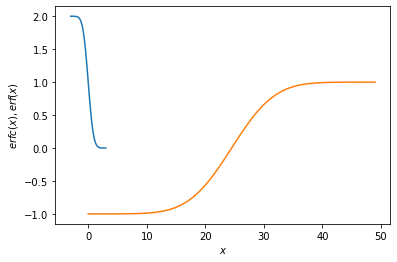

In [20]:
# Error function (integral of Gaussian)
 # its complement, and its inverse
import matplotlib.pyplot as plt
x = np.array([0, 0.3, 0.7, 1.0])
print("erf(x) =", special.erf(x))
print("erfc(x) =", special.erfc(x))
print("erfinv(x) =", special.erfinv(x))
x = np.linspace(-3, 3)
plt.plot(x, special.erfc(x),special.erf(x))  # no. of graphs can be mentioned here on the right side
plt.xlabel('$x$')
plt.ylabel('$erfc(x),erf(x)$')
plt.show()

In [33]:
special?

In [38]:
np.empty(5)

array([1.e-323, 1.e-323, 8.e-323, 4.e-323, 0.e+000])

In [39]:
np.multiply?

# Advanced Ufunc Features


## Specifying output


For large calculations, it is sometimes useful to be able to specify the array where the
result of the calculation will be stored. Rather than creating a temporary array, you
can use this to write computation results directly to the memory location where you’d like them to be.


In [27]:
x = np.arange(5)
y = np.empty(5)
np.multiply(x, 10, out=y)
print(y)


[ 0. 10. 20. 30. 40.]


In the above example:
out :
    A location into which the result is stored. If provided, it must have
    a shape that the inputs broadcast to. If not provided or None,
    a freshly-allocated array is returned. A tuple (possible only as a
    keyword argument) must have length equal to the number of outputs.

In [28]:
y = np.zeros(10)
np.power(2, x, out=y[::2])  # x is taken frm the above equation
print(y)


[ 1.  0.  2.  0.  4.  0.  8.  0. 16.  0.]


If we had instead written y[::2] = 2 ** x, this would have resulted in the creation
of a temporary array to hold the results of 2 ** x, followed by a second operation
copying those values into the y array. This doesn’t make much of a difference for such
a small computation, but for very large arrays the memory savings from careful use of
the out argument can be significant.

In [5]:
np.add.reduce? # reduce function is used to perform on the array itself 

In [10]:
x = np.arange(1,6)
print(x)
np.add.reduce(x) # The array formed adds its elements and gives the output

[1 2 3 4 5]


15

In [30]:
np.add(x,5)  # This infact adds 5 to the array x 

array([5, 6, 7, 8, 9])

In [11]:
X = np.arange(8).reshape((2,2,2))
X

array([[[0, 1],
        [2, 3]],

       [[4, 5],
        [6, 7]]])

In [12]:
np.add.reduce(X)

array([[ 4,  6],
       [ 8, 10]])

In [13]:
np.add.accumulate(X) # This array is not demonstrating accumulate function propery 

array([[[ 0,  1],
        [ 2,  3]],

       [[ 4,  6],
        [ 8, 10]]], dtype=int32)

In [14]:
y=np.arange(1,6)
y

array([1, 2, 3, 4, 5])

In [16]:
np.add.accumulate(y) # On the place of each value, accumulate adds all the prior elements upto that element and store at that place

array([ 1,  3,  6, 10, 15], dtype=int32)

In [19]:
np.multiply.accumulate(y)

array([  1,   2,   6,  24, 120], dtype=int32)

In [21]:
np.cumsum(y) # works the same as np.add.accumulate(y)

array([ 1,  3,  6, 10, 15], dtype=int32)

In [25]:
np.prod(y) # np.multiply.reduce(y)

120

In [28]:
np.sum(y) # np.add.reduce(y)

15

In [31]:
np.cumprod(y) # np.multiply.accumulate(y)

array([  1,   2,   6,  24, 120], dtype=int32)

## Outer products

In [32]:
np.multiply.outer(y, y)


array([[ 1,  2,  3,  4,  5],
       [ 2,  4,  6,  8, 10],
       [ 3,  6,  9, 12, 15],
       [ 4,  8, 12, 16, 20],
       [ 5, 10, 15, 20, 25]])

Another extremely useful feature of ufuncs is the ability to operate between arrays of
different sizes and shapes, a set of operations known as broadcasting

# Aggregations: Min, Max, and Everything in Between


In [44]:
L = np.random.random(100) #   Return random floats in the half-open interval [0.0, 1.0). Alias for 
sum(L)                         #  `random_sample` to ease forward-porting to the new random API.



47.55636401185516

In [55]:
big_array = np.random.rand(1000000)
%timeit sum(big_array)
%timeit np.sum(big_array)

250 ms ± 6.71 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.45 ms ± 47.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [56]:
np.min(big_array) # min(big_array) takes hell lot of time

1.890489775835391e-07

In [57]:
np.max(big_array) # max(big_array)

0.9999993031657582

In [3]:
import numpy as np
M = np.random.random((3, 4))
print(M)

[[0.2279908  0.96025292 0.82400415 0.82603621]
 [0.77442391 0.52782854 0.22468965 0.73251428]
 [0.22546498 0.2029675  0.29746708 0.70403646]]


In [5]:
np.max(M,axis=1) # M.max(axis=1)

array([0.96025292, 0.77442391, 0.70403646])

In [6]:
np.min(M,axis=0) # M.min(axis=0)

array([0.22546498, 0.2029675 , 0.22468965, 0.70403646])

The way the axis is specified here can be confusing to users coming from other languages. The axis keyword specifies the dimension of the array that will be collapsed,
rather than the dimension that will be returned.So specifying axis=0 means that the
first axis will be collapsed: for two-dimensional arrays, this means that values within
each column will be aggregated.